In [6]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
import matplotlib.pylab as pl
import shap
import xgboost
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score, f1_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from functools import reduce
from numpy import savetxt
from numpy import sqrt
from sklearn.model_selection import KFold
from numpy import argmax
from xgboost import XGBClassifier
import warnings

warnings.filterwarnings('ignore')

# print the JS visualization code to the notebook
#shap.initjs()

# Model 1: Logistics Regression Classifier

In [7]:
class LogisticRegressionClassifier:

    def __init__(self, n=100):
        self.n = n

    def fit(self, X, y, random_state=0, criterion='entropy'):
        X_train_p = X[y==1]
        X_train_n = X[y==0]
        y_train_p = y[y==1]
        y_train_n = y[y==0]
        l = sum(y_train_p)
        clf_list = []
        np.random.seed(seed=random_state)
        for i in range(self.n):
            idx_n = np.random.choice(range(X_train_n.shape[0]), l)
            idx_p = np.random.choice(range(X_train_p.shape[0]), l)
            X_train_f = np.concatenate([X_train_n[idx_n, :], X_train_p[idx_p]])
            y_train_f = np.concatenate([y_train_n[idx_n], y_train_p[idx_p]])
            clf = LogisticRegression(C=1)
            clf.fit(X_train_f, y_train_f)
            clf_list.append(clf)
            print(f'\rClassifier {i+1} completed.', end='')
        self.clfs = clf_list        
    
    #def coefficients(self):
        #feature_importance = abs(self.clfs[0].coef_)
        #for tree in self.clfs[1:]:
            #feature_importance += tree.coef_
        #return feature_importance/ self.n
    
    def predict(self, X):
        result_list = list(map(lambda clf: clf.predict_proba(X)[:,1], self.clfs)) # proba of label: y==1
        score = reduce(lambda a, b: a+b, result_list) / len(self.clfs)
        return score
        
    #def report(self, X, y):
        #y_hat = self.predict(X)
        #print(classification_report(y_test, 1.*(y_hat>0.5)))
    
    #def Rscore(self,X, y):
        #y_hat = self.predict(X)
        #score = recall_score(y, 1.*(y_hat>0.455142),pos_label=1)
        #return score
    
    #def Ascore(self,X, y):
        #y_hat = self.predict(X)
        #score = accuracy_score(y, 1.*(y_hat>0.455142))
        #return score
    
    def predict_proba(self,X):
        result_list = list(map(lambda clf: 100*clf.predict_proba(X)[:,1], self.clfs))
        proba = reduce(lambda a, b: a+b, result_list) / len(self.clfs)
        return proba

# Model 2: XGBoost Classifier

In [8]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
 max_depth= 3, 
 min_child_weight= 5,
 gamma=0.4,
 learning_rate =0.1,
 n_estimators=1000,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1)

# Try Pipeline

In [9]:
# Define the pipeline
# Step 1: Split the data into training and testing
# Step 2: Train in Logistic Regression Classifier Model
logistics_pipeline = Pipeline(steps=[('logisticsclassifier', LogisticRegressionClassifier(500))])
xgb_pipeline = Pipeline(steps=[('xgbclassifier', xgb)])

In [10]:
#clf = logistics_pipeline.fit(X_train, y_train)
#xgb_pipeline.fit(X_train,y_train)
#print("")
#print("Recall of label = 1 for testing data in logistics regression model: %.3f" % clf.Rscore(X_test, y_test))
#print("Recall of label = 1 for testing data in xgboost model: %.3f" % xgb_pipeline.recall_score(X_test, y_test))

# Try Defining function

In [11]:
def evaluate(name, y_train, y_test, y_pred_train, y_pred_test):
    print('')
    print('')
    print(name)
    print('Classfication Report for training data: ')
    print(classification_report(y_train, y_pred_train))
    print('Classfication Report for testing data: ')
    print(classification_report(y_test, y_pred_test))

In [12]:
def roc_curve_and_score(y_test, pred_proba):
    fpr, tpr, _ = roc_curve(y_test.ravel(), pred_proba.ravel())
    roc_auc = roc_auc_score(y_test.ravel(), pred_proba.ravel())
    return fpr, tpr, roc_auc

-----------------------------------------------------------
table_nephritis_age.csv
Classifier 500 completed.

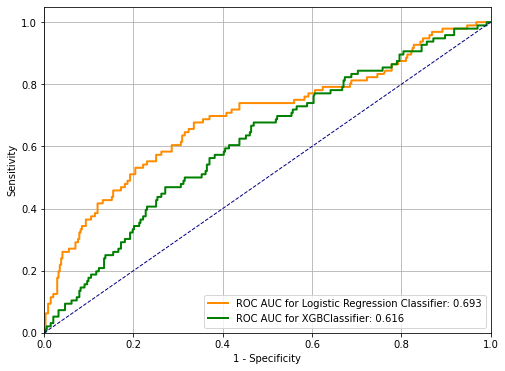

Best Threshold=0.465494, G-Mean=0.671


Logistic Regression Classifier
Classfication Report for training data: 
              precision    recall  f1-score   support

           0       0.87      0.56      0.68      1043
           1       0.29      0.68      0.41       274

    accuracy                           0.59      1317
   macro avg       0.58      0.62      0.55      1317
weighted avg       0.75      0.59      0.63      1317

Classfication Report for testing data: 
              precision    recall  f1-score   support

           0       0.88      0.66      0.76       343
           1       0.36      0.67      0.47        96

    accuracy                           0.67       439
   macro avg       0.62      0.67      0.61       439
weighted avg       0.76      0.67      0.69       439



XGBoost Classifier
Classfication Report for training data: 
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1043
           1       0.82

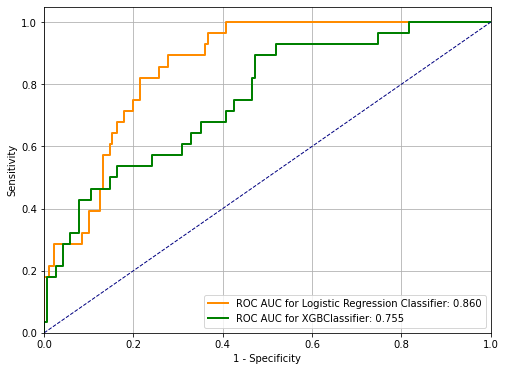

Best Threshold=0.549428, G-Mean=0.803


Logistic Regression Classifier
Classfication Report for training data: 
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       532
           1       0.44      0.73      0.55       123

    accuracy                           0.78       655
   macro avg       0.69      0.76      0.70       655
weighted avg       0.84      0.78      0.80       655

Classfication Report for testing data: 
              precision    recall  f1-score   support

           0       0.96      0.79      0.86       191
           1       0.35      0.79      0.48        28

    accuracy                           0.79       219
   macro avg       0.66      0.79      0.67       219
weighted avg       0.88      0.79      0.82       219



XGBoost Classifier
Classfication Report for training data: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       532
           1       1.00

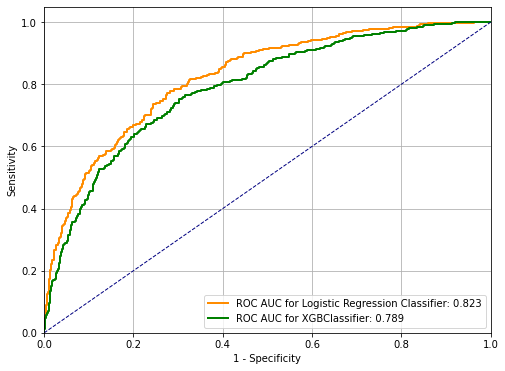

Best Threshold=0.472010, G-Mean=0.748


Logistic Regression Classifier
Classfication Report for training data: 
              precision    recall  f1-score   support

           0       0.84      0.71      0.77      2565
           1       0.60      0.77      0.67      1452

    accuracy                           0.73      4017
   macro avg       0.72      0.74      0.72      4017
weighted avg       0.76      0.73      0.74      4017

Classfication Report for testing data: 
              precision    recall  f1-score   support

           0       0.85      0.73      0.78       864
           1       0.61      0.77      0.68       475

    accuracy                           0.74      1339
   macro avg       0.73      0.75      0.73      1339
weighted avg       0.76      0.74      0.75      1339



XGBoost Classifier
Classfication Report for training data: 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      2565
           1       0.77

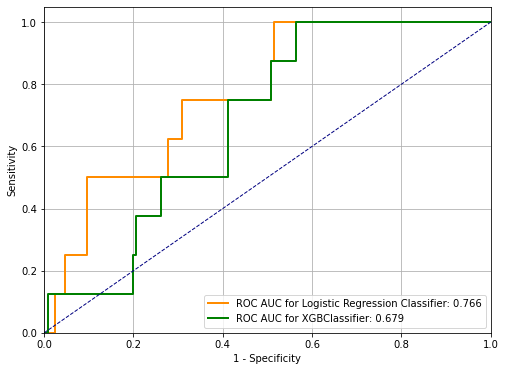

Best Threshold=0.363068, G-Mean=0.720


Logistic Regression Classifier
Classfication Report for training data: 
              precision    recall  f1-score   support

           0       0.99      0.69      0.82       388
           1       0.09      0.86      0.17        14

    accuracy                           0.70       402
   macro avg       0.54      0.78      0.49       402
weighted avg       0.96      0.70      0.79       402

Classfication Report for testing data: 
              precision    recall  f1-score   support

           0       0.97      0.69      0.81       126
           1       0.11      0.62      0.19         8

    accuracy                           0.69       134
   macro avg       0.54      0.66      0.50       134
weighted avg       0.92      0.69      0.77       134



XGBoost Classifier
Classfication Report for training data: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       388
           1       1.00

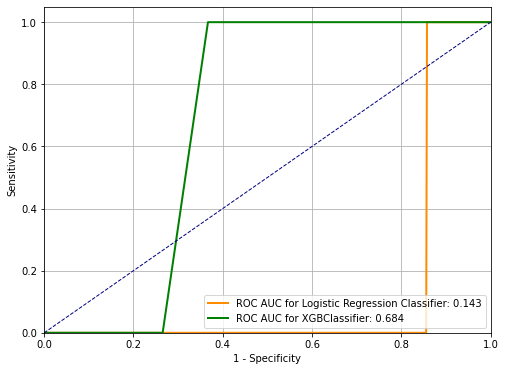

Best Threshold=0.340816, G-Mean=0.377


Logistic Regression Classifier
Classfication Report for training data: 
              precision    recall  f1-score   support

           0       1.00      0.17      0.29      3216
           1       0.00      1.00      0.01         7

    accuracy                           0.17      3223
   macro avg       0.50      0.58      0.15      3223
weighted avg       1.00      0.17      0.29      3223

Classfication Report for testing data: 
              precision    recall  f1-score   support

           0       0.99      0.14      0.25      1074
           1       0.00      0.00      0.00         1

    accuracy                           0.14      1075
   macro avg       0.50      0.07      0.13      1075
weighted avg       0.99      0.14      0.25      1075



XGBoost Classifier
Classfication Report for training data: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3216
           1       0.00

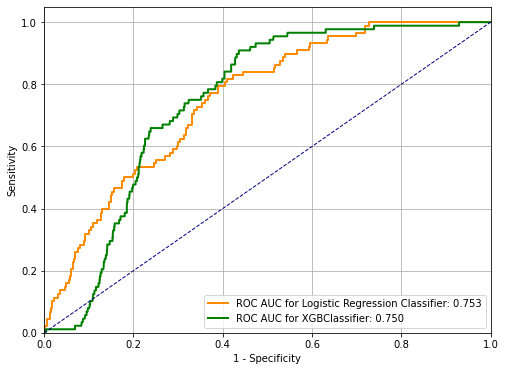

Best Threshold=0.440062, G-Mean=0.697


Logistic Regression Classifier
Classfication Report for training data: 
              precision    recall  f1-score   support

           0       0.98      0.65      0.78      3787
           1       0.16      0.87      0.27       301

    accuracy                           0.66      4088
   macro avg       0.57      0.76      0.53      4088
weighted avg       0.92      0.66      0.74      4088

Classfication Report for testing data: 
              precision    recall  f1-score   support

           0       0.98      0.63      0.76      1275
           1       0.13      0.77      0.22        88

    accuracy                           0.64      1363
   macro avg       0.55      0.70      0.49      1363
weighted avg       0.92      0.64      0.73      1363



XGBoost Classifier
Classfication Report for training data: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3787
           1       0.80

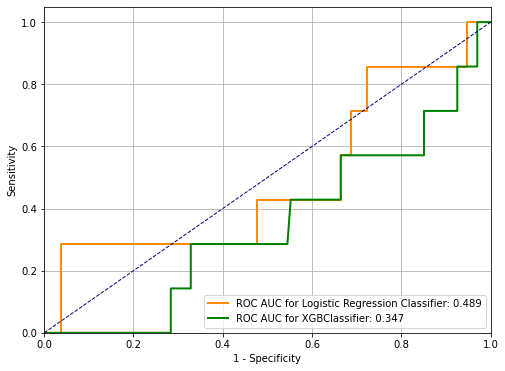

Best Threshold=0.587802, G-Mean=0.524


Logistic Regression Classifier
Classfication Report for training data: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       407
           1       0.12      0.12      0.12        16

    accuracy                           0.93       423
   macro avg       0.54      0.54      0.54       423
weighted avg       0.93      0.93      0.93       423

Classfication Report for testing data: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       134
           1       0.29      0.29      0.29         7

    accuracy                           0.93       141
   macro avg       0.62      0.62      0.62       141
weighted avg       0.93      0.93      0.93       141



XGBoost Classifier
Classfication Report for training data: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       407
           1       1.00

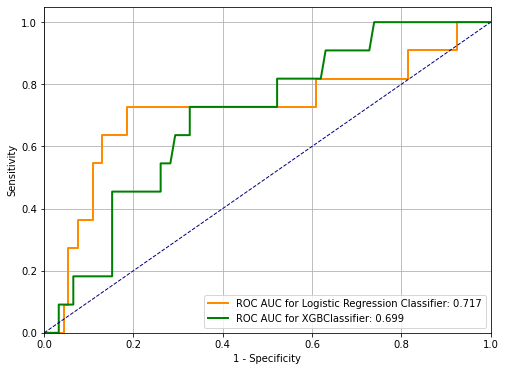

Best Threshold=0.498067, G-Mean=0.770


Logistic Regression Classifier
Classfication Report for training data: 
              precision    recall  f1-score   support

           0       0.98      0.78      0.87       286
           1       0.23      0.78      0.35        23

    accuracy                           0.78       309
   macro avg       0.60      0.78      0.61       309
weighted avg       0.92      0.78      0.83       309

Classfication Report for testing data: 
              precision    recall  f1-score   support

           0       0.95      0.82      0.88        92
           1       0.29      0.64      0.40        11

    accuracy                           0.80       103
   macro avg       0.62      0.73      0.64       103
weighted avg       0.88      0.80      0.83       103



XGBoost Classifier
Classfication Report for training data: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       286
           1       0.83

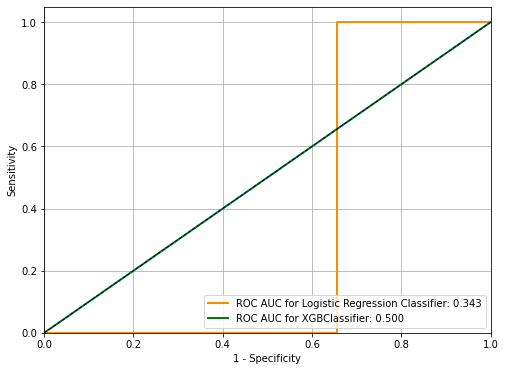

Best Threshold=0.330322, G-Mean=0.586


Logistic Regression Classifier
Classfication Report for training data: 
              precision    recall  f1-score   support

           0       1.00      0.35      0.51       619
           1       0.00      1.00      0.01         2

    accuracy                           0.35       621
   macro avg       0.50      0.67      0.26       621
weighted avg       1.00      0.35      0.51       621

Classfication Report for testing data: 
              precision    recall  f1-score   support

           0       0.99      0.34      0.51       207
           1       0.00      0.00      0.00         1

    accuracy                           0.34       208
   macro avg       0.49      0.17      0.25       208
weighted avg       0.98      0.34      0.51       208



XGBoost Classifier
Classfication Report for training data: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       619
           1       0.00

In [13]:
def main():
    
    # ---------- Prepare data ---------------------------- #
    for filename in ['table_nephritis_age.csv', 'table_diabetes.csv','table_hypertension.csv', 'table_chronic_liver_disease.csv', 'table_Parkinson.csv','all_heart.csv','breastcancer(normalized).csv','COPD(normalized_all).csv','lungcancer(normalized).csv']:
        data = pd.read_csv(filename)
        print('-----------------------------------------------------------')
        print(filename)
        X = data[data.columns[0:-1]].values
        y = data['y'].values
        X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X, y, test_size=0.25, random_state=0)
    
    # ---------- Logistic Regression Classifier -------------------------------------- #
            
        lr = LogisticRegressionClassifier(500)
        lr.fit(X_train_l, y_train_l)
        
   # ---------- XGBoost Classifier --------------------------------------------------- #

        xgb = XGBClassifier(max_depth= 3, min_child_weight= 5, gamma=0.4, learning_rate =0.1, n_estimators=1000, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1)
        xgb.fit(X_train_l,y_train_l)

    # ---------- AUC-ROC Curve ------------------------------------------------------- #    
        a = lr.predict_proba(X_test_l)/100
        b = xgb.predict_proba(X_test_l)[:,1]
        plt.figure(figsize=(8, 6))
        plt.grid()
        fpr_logistic, tpr_logistic, roc_auc_logistic = roc_curve_and_score(y_test_l, a)
        plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2,label='ROC AUC for Logistic Regression Classifier: {0:.3f}'.format(roc_auc_logistic))
        fpr_xgb, tpr_xgb, roc_auc_xgb = roc_curve_and_score(y_test_l, b)
        plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2,label='ROC AUC for XGBClassifier: {0:.3f}'.format(roc_auc_xgb))
        plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
        plt.legend(loc="lower right")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('1 - Specificity')
        plt.ylabel('Sensitivity')
        plt.show()
        
   # ---------- Determine the best threshold for logistic Regression Classifier ------ #  
        fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test_l, a)
        gmeans = sqrt(tpr_logistic * (1-fpr_logistic))
        # locate the index of the largest g-mean
        ix = argmax(gmeans)
        print('Best Threshold=%f, G-Mean=%.3f' % (thresholds_logistic[ix], gmeans[ix])) 
    
   # ---------- Predict testing data ------------------------------------------------- #  
        y_pred_train_lr = 1.*(lr.predict(X_train_l)>thresholds_logistic[ix])
        y_pred_test_lr = 1.*(lr.predict(X_test_l)>thresholds_logistic[ix])

        y_pred_train_xgb = xgb.predict(X_train_l)
        y_pred_test_xgb = xgb.predict(X_test_l)
    
    # ---------- Metrics --------------------------------- #    
    
        evaluate('Logistic Regression Classifier', y_train_l, y_test_l, y_pred_train_lr, y_pred_test_lr)  
        evaluate('XGBoost Classifier', y_train_l, y_test_l, y_pred_train_xgb, y_pred_test_xgb)  
        

    
if __name__ == '__main__':
    main()